In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pipeline as p
import assess_clf_models as acm
%load_ext autoreload
%autoreload 2

/Users/kendra/anaconda3/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.pipeline import make_pipeline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import StratifiedKFold, learning_curve

from sklearn.metrics import confusion_matrix

In [4]:
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

# plt.style.use('/Users/kendra/.matplotlib/kf_fig.mplstyle')
plt.style.use('/Users/kendra/.matplotlib/base_style.mplstyle')
# plt.style.use('ggplot')
# rcParams.update(mpl.rcParamsDefault)

In [5]:
seed = 19

#### Load & Prep data

In [7]:
# Data without sub-types (larger)
X_train = p.open_pkl('Data/X_train_unprocessed.pkl')
y_train = p.open_pkl('Data/y_train_unprocessed.pkl')
X_test = p.open_pkl('Data/X_test_unprocessed.pkl')
y_test = p.open_pkl('Data/y_test_unprocessed.pkl')

In [6]:
X_train.head()

,MAR_STAT_MOD,RACE_MOD,AGE_DX,GRADE,TUMSIZ,SURG,SEQ_NUM,POS_NODES,HST_STGA,INVAS
0,1.0,01,79.0,3.0,15.0,1.0,2,0.0,1.0,1
1,0.0,01,94.0,2.0,20.0,1.0,0,0.0,1.0,1
2,0.0,01,80.0,3.0,1.0,1.0,0,0.0,1.0,1
3,1.0,01,76.0,1.0,18.0,1.0,0,0.0,1.0,1
4,1.0,01,84.0,1.0,8.0,1.0,2,0.0,1.0,1


In [8]:
# Data with sub-types (fewer # rows)
X_train_sub = p.open_pkl('Data/X_train_unproc_with_sub.pkl')
y_train_sub = p.open_pkl('Data/y_train_unproc_with_sub.pkl')
X_test_sub = p.open_pkl('Data/X_test_unproc_with_sub.pkl')
y_test_sub = p.open_pkl('Data/y_test_unproc_with_sub.pkl')

In [9]:
X_train_sub_wo = X_train_sub.drop(columns=['BRST_SUB'])
X_test_sub_wo = X_test_sub.drop(columns=['BRST_SUB'])

In [10]:
preproc1 = p.open_pkl('Data/preprocess_wo_sub.pkl')
preproc2 = p.open_pkl('Data/preprocess_with_sub.pkl')

### Generate test ROC curve for each model:

In [14]:
log_reg = LogisticRegression(solver='liblinear')
grad_boost = GradientBoostingClassifier()
ada = AdaBoostClassifier()
rand_for = RandomForestClassifier(n_estimators=10)
# nb = GaussianNB()
# svm_model = svm.SVC(kernel='linear')

In [14]:
mod1 = acm.test_roc_auc(preproc1, grad_boost, X_train, y_train, X_test, y_test)
mod2 = acm.test_roc_auc(preproc1, log_reg, X_train, y_train, X_test, y_test)

In [79]:
mod3 = acm.test_roc_auc(preproc2, grad_boost, X_train_sub, y_train_sub, X_test_sub, y_test_sub)
mod4 = acm.test_roc_auc(preproc1, grad_boost, X_train_sub_wo, y_train_sub, X_test_sub_wo, y_test_sub)

In [140]:
mod5 = acm.test_roc_auc(preproc1, rand_for, X_train, y_train, X_test, y_test)

### Plot them:

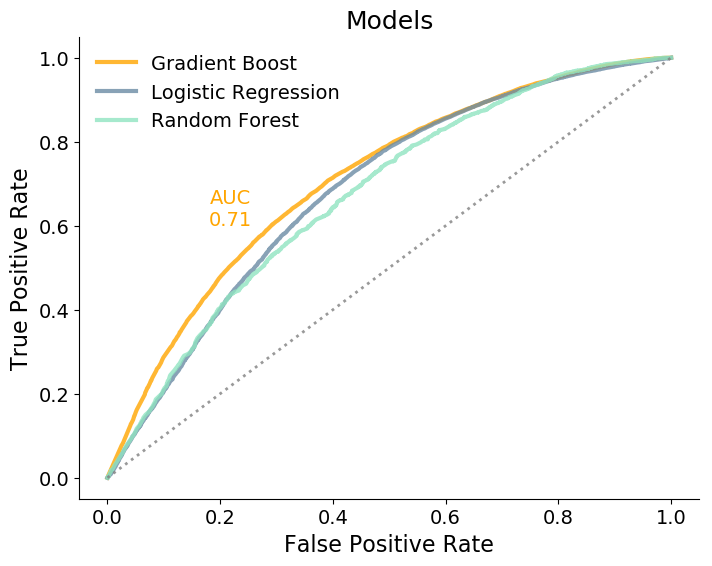

In [179]:
mod_list = {'Gradient Boost': mod1, 'Logistic Regression': mod2, 'Random Forest': mod3}
color_list = ['orange', 'xkcd:grey blue','xkcd:light teal']
# lstyle_list = ['-','-','--','--']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

i = 0
for name, model in mod_list.items():

    plt.plot(model[0], model[1],
             label=f"{name}", # (AUC = {model[2]: .2f})",
             color=color_list[i], #linestyle=lstyle_list[i],
             lw=3, alpha=.8)
    i += 1

plt.plot([0, 1], [0, 1], linestyle=':', lw=2, color='grey',alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.axes.spines.bottom = True
# axes.spines.top    : False
# axes.spines.right  : False
plt.legend(loc="upper left", fontsize=14, frameon=False)
plt.text(0.18, 0.6, 'AUC\n0.71', fontsize=14, color='orange', multialignment='center')
plt.title('Models', fontsize=18)
plt.savefig('Figures/ROC_curves_wo_sub.png', dpi=300, transparent=False)

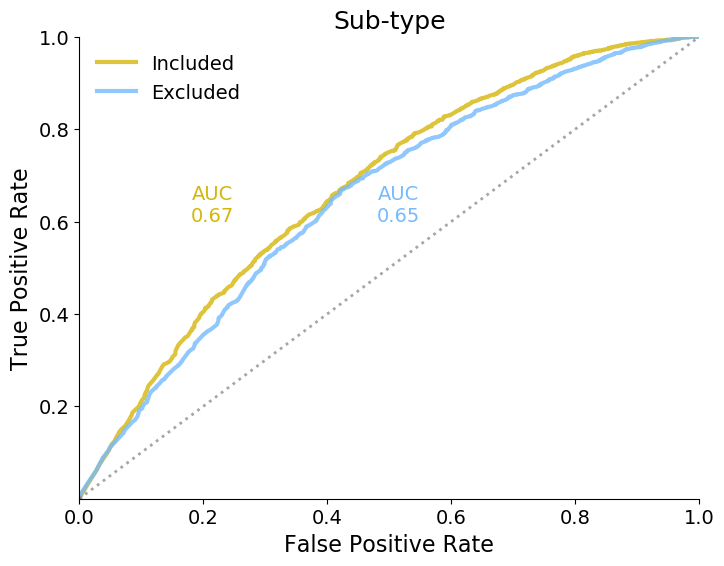

In [205]:
mod_list = {'Included': mod3, 'Excluded': mod4}
color_list = ['xkcd:dark yellow','xkcd:sky blue']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

i = 0
for name, model in mod_list.items():

    plt.plot(model[0], model[1],
             label=f"{name}", # (AUC = {model[2]: .2f})",
             color=color_list[i],
             lw=3, alpha=.8)
    i += 1

plt.plot([0, 1], [0, 1], linestyle=':', lw=2, color='grey', alpha=.7)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0],labels=["0.2", "0.4","0.6","0.8","1.0"],fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc="upper left", fontsize=14, frameon=False)
plt.text(0.18, 0.6, 'AUC\n0.67', fontsize=14, color=color_list[0], multialignment='center')
plt.text(0.48, 0.6, 'AUC\n0.65', fontsize=14, color='xkcd:sky blue', multialignment='center')
plt.xlim(0,1)
plt.ylim(0,1)

plt.title('Sub-type', fontsize=18)
plt.savefig('Figures/ROC_curves_with_sub.png', dpi=300, transparent=False)

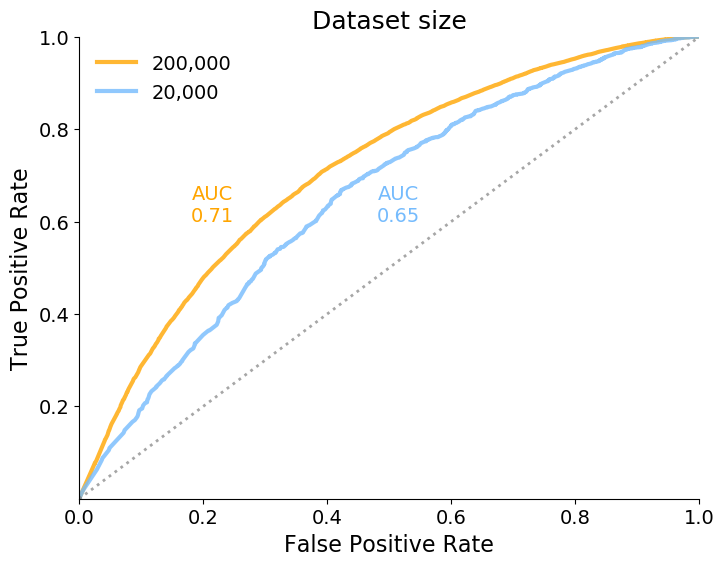

In [206]:
mod_list = {'200,000': mod1, '20,000': mod4}
# lstyle_list = ['-','--']
color_list = ['orange', 'xkcd:sky blue']
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

i = 0
for name, model in mod_list.items():

    plt.plot(model[0], model[1],
             label=f"{name}", # (AUC = {model[2]: .2f})",
#              color='orange', linestyle=lstyle_list[i],
             color=color_list[i],
             lw=3, alpha=.8)
    i += 1

plt.plot([0, 1], [0, 1], linestyle=':', lw=2, color='grey', alpha=.7)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0],labels=["0.2", "0.4","0.6","0.8","1.0"],fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend(loc="upper left", fontsize=14, frameon=False);
plt.text(0.18, 0.6, 'AUC\n0.71', fontsize=14, color='orange', multialignment='center')
plt.text(0.48, 0.6, 'AUC\n0.65', fontsize=14, color='xkcd:sky blue', multialignment='center')
plt.xlim(0,1)
plt.ylim(0,1)


plt.title('Dataset size', fontsize=18)
plt.savefig('Figures/ROC_curves_lg_vs_small_dataset.png', dpi=300, transparent=False)

### Learning curve

In [57]:
pipe = Pipeline(steps=[('preprocessor', preproc1), ('classifier', grad_boost)])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', StandardScaler(copy=True, with_mean=True, with_std=True), [2, 4, 7]), ('cat', OneHotEncoder(categorical_features=None, categories='a...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])

In [216]:
train_sizes = [100, 1000, 5000, 10000, 20000, 50000, 100000, 120000]

cv = StratifiedKFold(n_splits=5, random_state=seed)

train_sizes, train_scores, test_scores = learning_curve(
    pipe, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring='roc_auc')

In [217]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

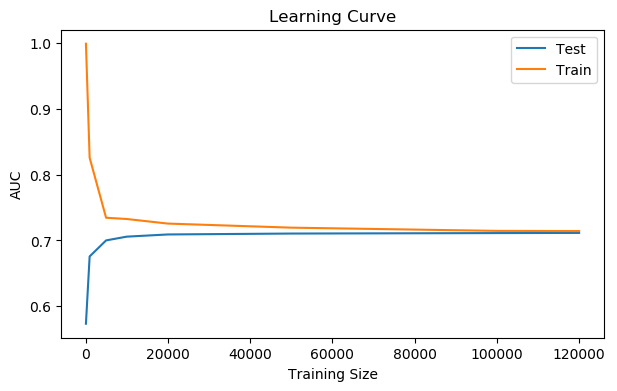

In [218]:
plt.figure(figsize=(7,4))

plt.plot(train_sizes, test_mean, label='Test')
plt.plot(train_sizes, train_mean, label='Train')

plt.legend()
plt.xlabel('Training Size')
plt.ylabel('AUC')
plt.title('Learning Curve');
plt.savefig('Learning_Curve.svg', dpi=300, transparent=False);
# plt.tight_layout(rect=[0, 0, 1, 1]);

### Confusion Matrix & Classification Report

In [58]:
y_pred = pipe.predict(X_test)

In [59]:
cm = confusion_matrix(y_test, y_pred) / len(y_test)
cm

array([[ 0.02800162,  0.134936  ],
       [ 0.01544141,  0.82162097]])

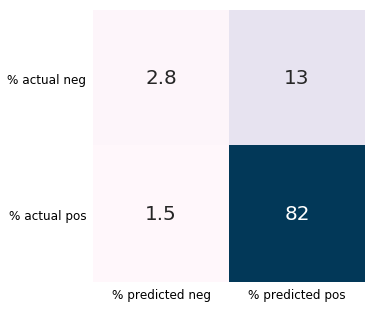

In [41]:
plt.figure(figsize=(6,5))
sns.heatmap(cm * 100.0, xticklabels=['% predicted neg', '% predicted pos'], 
            yticklabels=['% actual neg', '% actual pos'], annot=True, square=True,
            annot_kws={'fontsize':20}, cmap="PuBu", cbar=False)
plt.yticks(rotation=0)
plt.tick_params(axis='both', bottom=False);
plt.savefig('Figures/cm_heatmap.png', dpi=300, transparent=False)

In [42]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.17      0.27     10858
           1       0.86      0.98      0.92     55781

   micro avg       0.85      0.85      0.85     66639
   macro avg       0.75      0.58      0.59     66639
weighted avg       0.82      0.85      0.81     66639



In [45]:
acm.specificity_scorer(y_test, y_pred)

0.64455958549222803

### Feature importance

In [66]:
print(pipe)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', StandardScaler(copy=True, with_mean=True, with_std=True), [2, 4, 7]), ('cat', OneHotEncoder(categorical_features=None, categories='a...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])


In [67]:
preproc1.named_transformers_['cat'].get_feature_names()

array(['x0_01', 'x0_02', 'x0_03'], dtype=object)

In [84]:
preproc1.named_transformers_['num']

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
X_tr_proc = preproc1.fit_transform(X_train)

In [81]:
X_train.loc[0,:]

MAR_STAT_MOD     1
RACE_MOD        01
AGE_DX          79
GRADE            3
TUMSIZ          15
SURG             1
SEQ_NUM          2
POS_NODES        0
HST_STGA         1
INVAS            1
Name: 0, dtype: object

In [80]:
X_tr_proc[0]

array([ 1.41189499, -0.30159618, -0.39079147,  1.        ,  0.        ,
        0.        ,  1.        ,  3.        ,  1.        ,  2.        ,
        1.        ,  1.        ])

In [85]:
fi = pipe.named_steps['classifier'].feature_importances_

In [86]:
fn = ['Age', 'Tumor Size', '# Pos Nodes', 'Race-White', 'Race-Black', 'Race-Other', 'Marrital Status', 
      'Grade', 'Surgery', '# of Tumors', 'Stage', 'Invasiveness']

In [118]:
fi_list = sorted(list(zip(fi, fn)), key=lambda x: x[0], reverse=False)

In [119]:
fi_plot_list = list(zip(*fi_list))

In [120]:
plot_ws = [x for x in fi_plot_list[0]]

In [121]:
plot_lbls = [x for x in fi_plot_list[1]]

<BarContainer object of 12 artists>

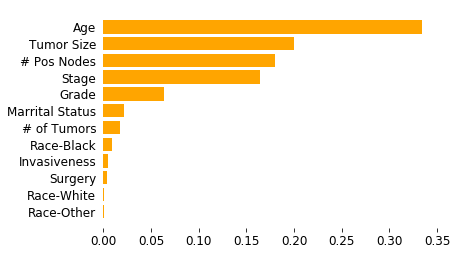

In [122]:
plt.barh(y=range(12), width=plot_ws, tick_label=plot_lbls, color='orange')

<BarContainer object of 12 artists>

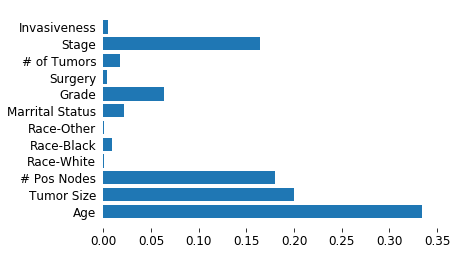

In [100]:
plt.barh(y=range(len(fi)), width=fi, tick_label=fn)

## Final model

In [191]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [196]:
final_model.fit(X, y)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', StandardScaler(copy=True, with_mean=True, with_std=True), [2, 4]), ('cat', OneHotEncoder(categorical_features=None, categories='auto',
    ...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])

In [197]:
p.pkl_this('Data\final_model.pkl', final_model)